# Project Name -   NETFLIX MOVIES AND TV SHOWS CLUSTERING

# Project Type - Unsupervised Machine Learning
# Contribution - Individual
# Name - Tushar Raskar
# GitHub Link
https://github.com/tusharraskar/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING.git

# Project Summary -

Netflix is the world's leading streaming entertainment service with over 209 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. 

The dataset consists of TV shows and movies available on Netflix as of 2019. It has been collected from Flixable which is a third-party Netflix search engine.
   
In this project, we have done
1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Handling Outliers
6. Data Cleaning and Feature Engineering

We have done Exploratory data Analysis to find out following insights:-
1. Which type of content are mostly added on Netflix and in which year?
2. Which movies/TV Shows are relased in which year?
3. Top 10 Actors and Directors
4. Best Genres on Netflix
5. Who are the top 10 countries producing content on Netflix and What type of content they produce?
6. Best Ratings of Movies/TV Shows
7. Duration of Movies/TV Shows

Then to retrieve text-based features we have used Feature Engineering:-
1. NLTK library for text cleaning and removing stop words.
2. Lemmatization to convert the sentence into a bag of words in their root form. 
3. TF-IDF to convert this bag of words into vectors.

We have applied three different Unsupervised Machine Learning methods to cluster our dataset based on text-based features.

1. K-Means Clustering
2. Hierarchial Clustering
3. DB SCAN


# Problem Statement
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.

The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, we are required to do

1. Exploratory Data Analysis
2. Understanding what type content is available in different countries
3. Is Netflix has increasingly focus on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features

# Attribute Information

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
import re
import string
import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
from nltk.corpus import stopwords  #stopwords
from nltk.tokenize import word_tokenize # tokenizing
from nltk.stem import WordNetLemmatizer  # lemmatizer from WordNet
import nltk 
nltk.download('punkt')
from collections import Counter

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer

#stop-words
# nltk.download('stopwords')
from nltk.corpus import stopwords
# STOPWORDS = set(stopwords.words('english'))
from wordcloud import WordCloud

# Importing libraries for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tushar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#  Dataset Loading
df = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [6]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

We have 0 duplicate values in dataset.

In [11]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

This dataset have 10 categorical features and 1 numerical feature.

Text(0.5, 1.0, ' Visualising Missing Values')

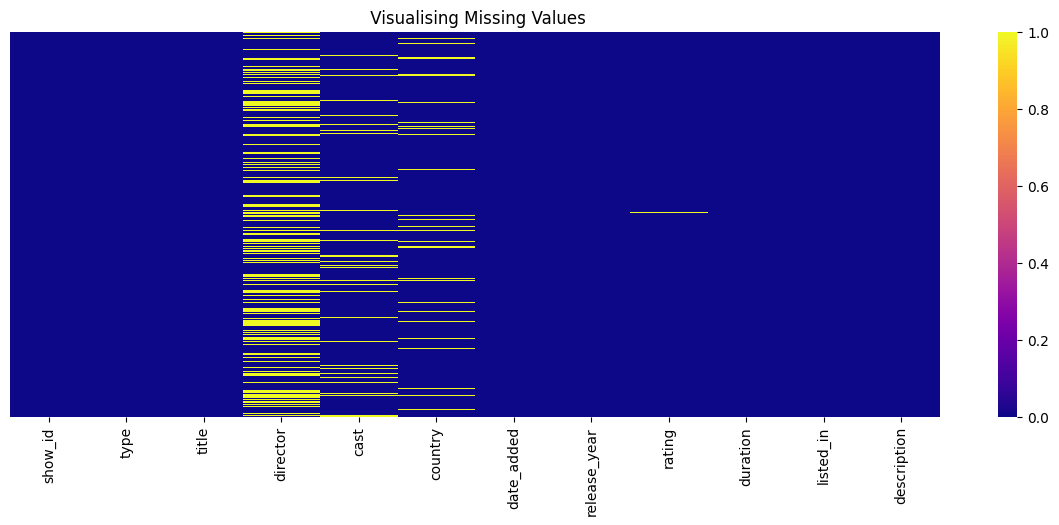

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

director column has highest NaN values 30.7% data is missing

cast, country , date_added , rating column has more than 10% NaN values

In order to treat missing values in director column we will fill the null values with unknown.

And in cast column we will fill the values with 'No cast'. country can be filled with mode value.

date added and rating are having very less missing values so they can be removed.

In [12]:
#HANDLING MISSING VALUES
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Understanding Variables

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe(include='O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,681,1563,14,216,491,7752
top,s1,Movie,3%,unknown,No cast,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5372,1,2376,718,3051,118,2861,1606,334,3


# Data Manipulation

In [17]:
# Create new features to store date, day, month and year separately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1
